# Prediksi Harga Rumah Menggunakan Linear Regression

Dataset yang digunakan adalah [California Housing Prices](https://www.kaggle.com/camnugent/california-housing-prices) yang dapat di download pada kaggle.

Data berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa ringkasan statistik tentang mereka berdasarkan data sensus 1990. Berhati-hatilah data tidak dibersihkan sehingga ada beberapa langkah pra-pemrosesan yang diperlukan! Kolomnya adalah sebagai berikut, nama mereka cukup jelas

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [ ]:
! wget https://www.dropbox.com/s/l2joslv79a8ajpy/california-housing-prices.csv

In [2]:
import pandas as pd

df_dataset = pd.read_csv("california-housing-prices.csv")
df_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_dataset.shape

(20640, 10)

Dari property shape diatas, dataset memiliki 10 field dan 20640 record

In [4]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Dataset yang digunakan memiliki 10 field dengan 9 field berformat numerik dan 1 field non numerik

In [5]:
df_dataset.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

Total record adalah 20.640

Tetapi untuk field total_bedrooms hanya memiliki 20433 record

In [6]:
df_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [7]:
df_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Data Exploration

### Target variable

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def plot_chart(xcol, ycol, dataframe):
  fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
  
  fig.suptitle(xcol)
  rot = 90

  axes[0].set_title('Price by ' + xcol)
  chart = sns.barplot(ax=axes[0], data=dataframe, x =xcol, y=ycol)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=rot, horizontalalignment='right')

  axes[1].set_title('Price by ' + xcol)
  chart2 = sns.boxplot(ax=axes[1], data=dataframe, x=xcol, y=ycol)
  chart2.set_xticklabels(chart.get_xticklabels(), rotation=rot, horizontalalignment='right')

  axes[2].set_title('Record Count')
  chart3 = sns.histplot(ax=axes[2], data=dataframe, x=xcol, color='steelblue')#, kde=True)
  chart3.set_xticklabels(chart.get_xticklabels(), rotation=rot, horizontalalignment='right')

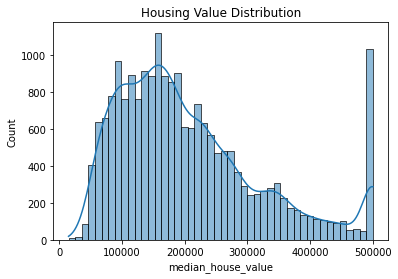

In [9]:
plt.title('Housing Value Distribution')
sns.histplot(df_dataset, x='median_house_value', kde=True)
plt.show()

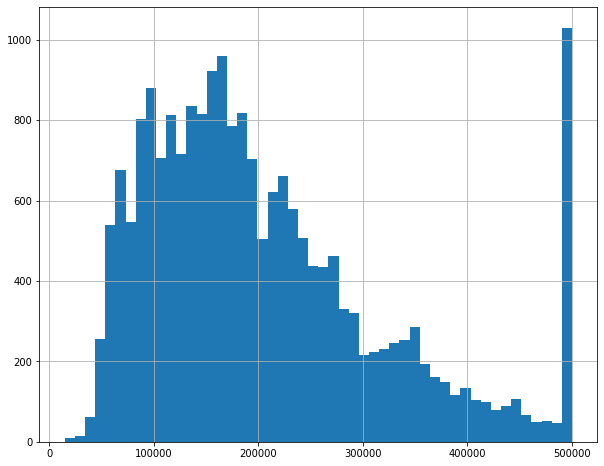

In [10]:
df_dataset['median_house_value'].hist(bins=50, figsize=(10, 8))
plt.show()

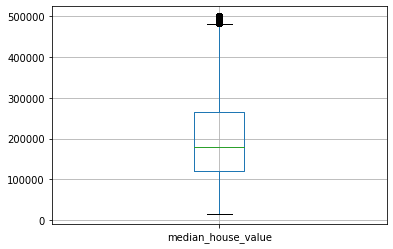

In [13]:
df_dataset.boxplot(column='median_house_value')
plt.show()

### Categorical Variables

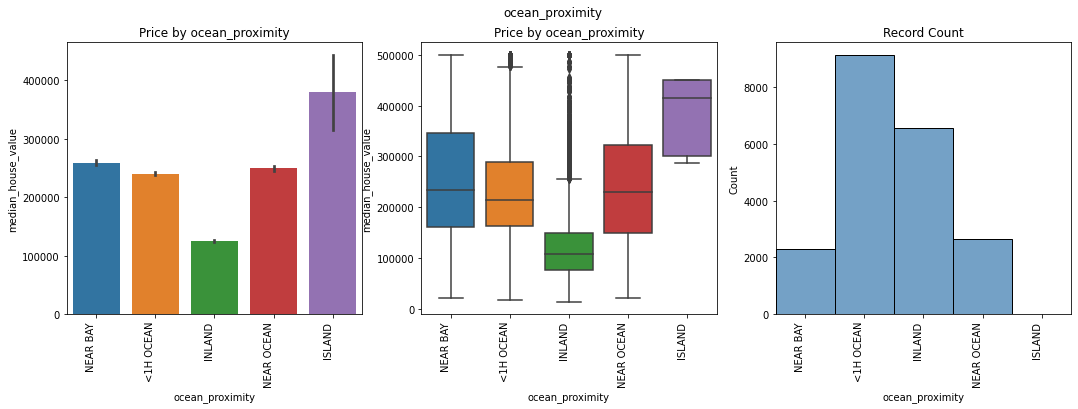

In [12]:
cat_column = ['ocean_proximity']

for col in cat_column:
  plot_chart(col,'median_house_value',df_dataset)

In [14]:
df_dataset.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Numerical Variables

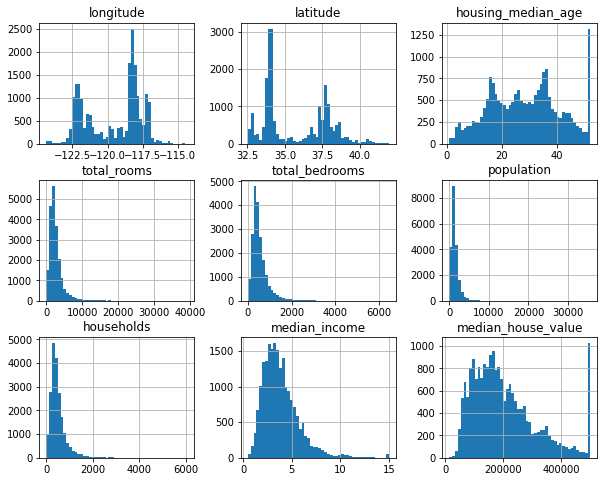

In [ ]:
df_dataset.hist(bins=50, figsize=(10, 8))
plt.show()

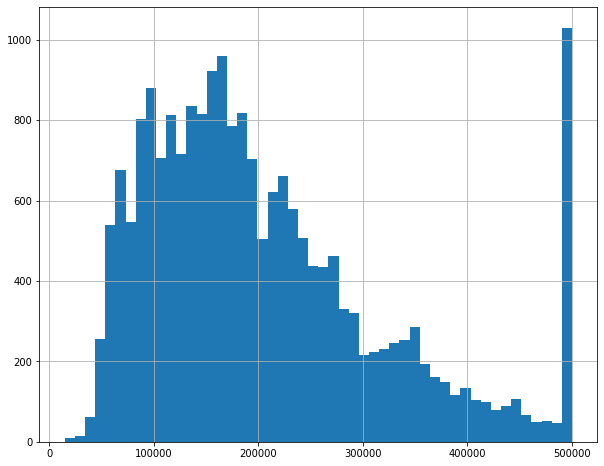

In [ ]:
df_dataset['median_house_value'].hist(bins=50, figsize=(10, 8))
plt.show()

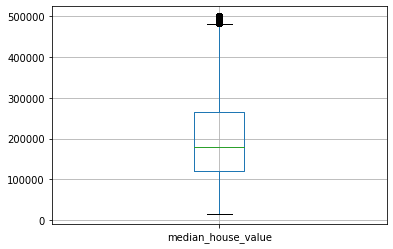

In [ ]:
df_dataset.boxplot(column='median_house_value')
plt.show()

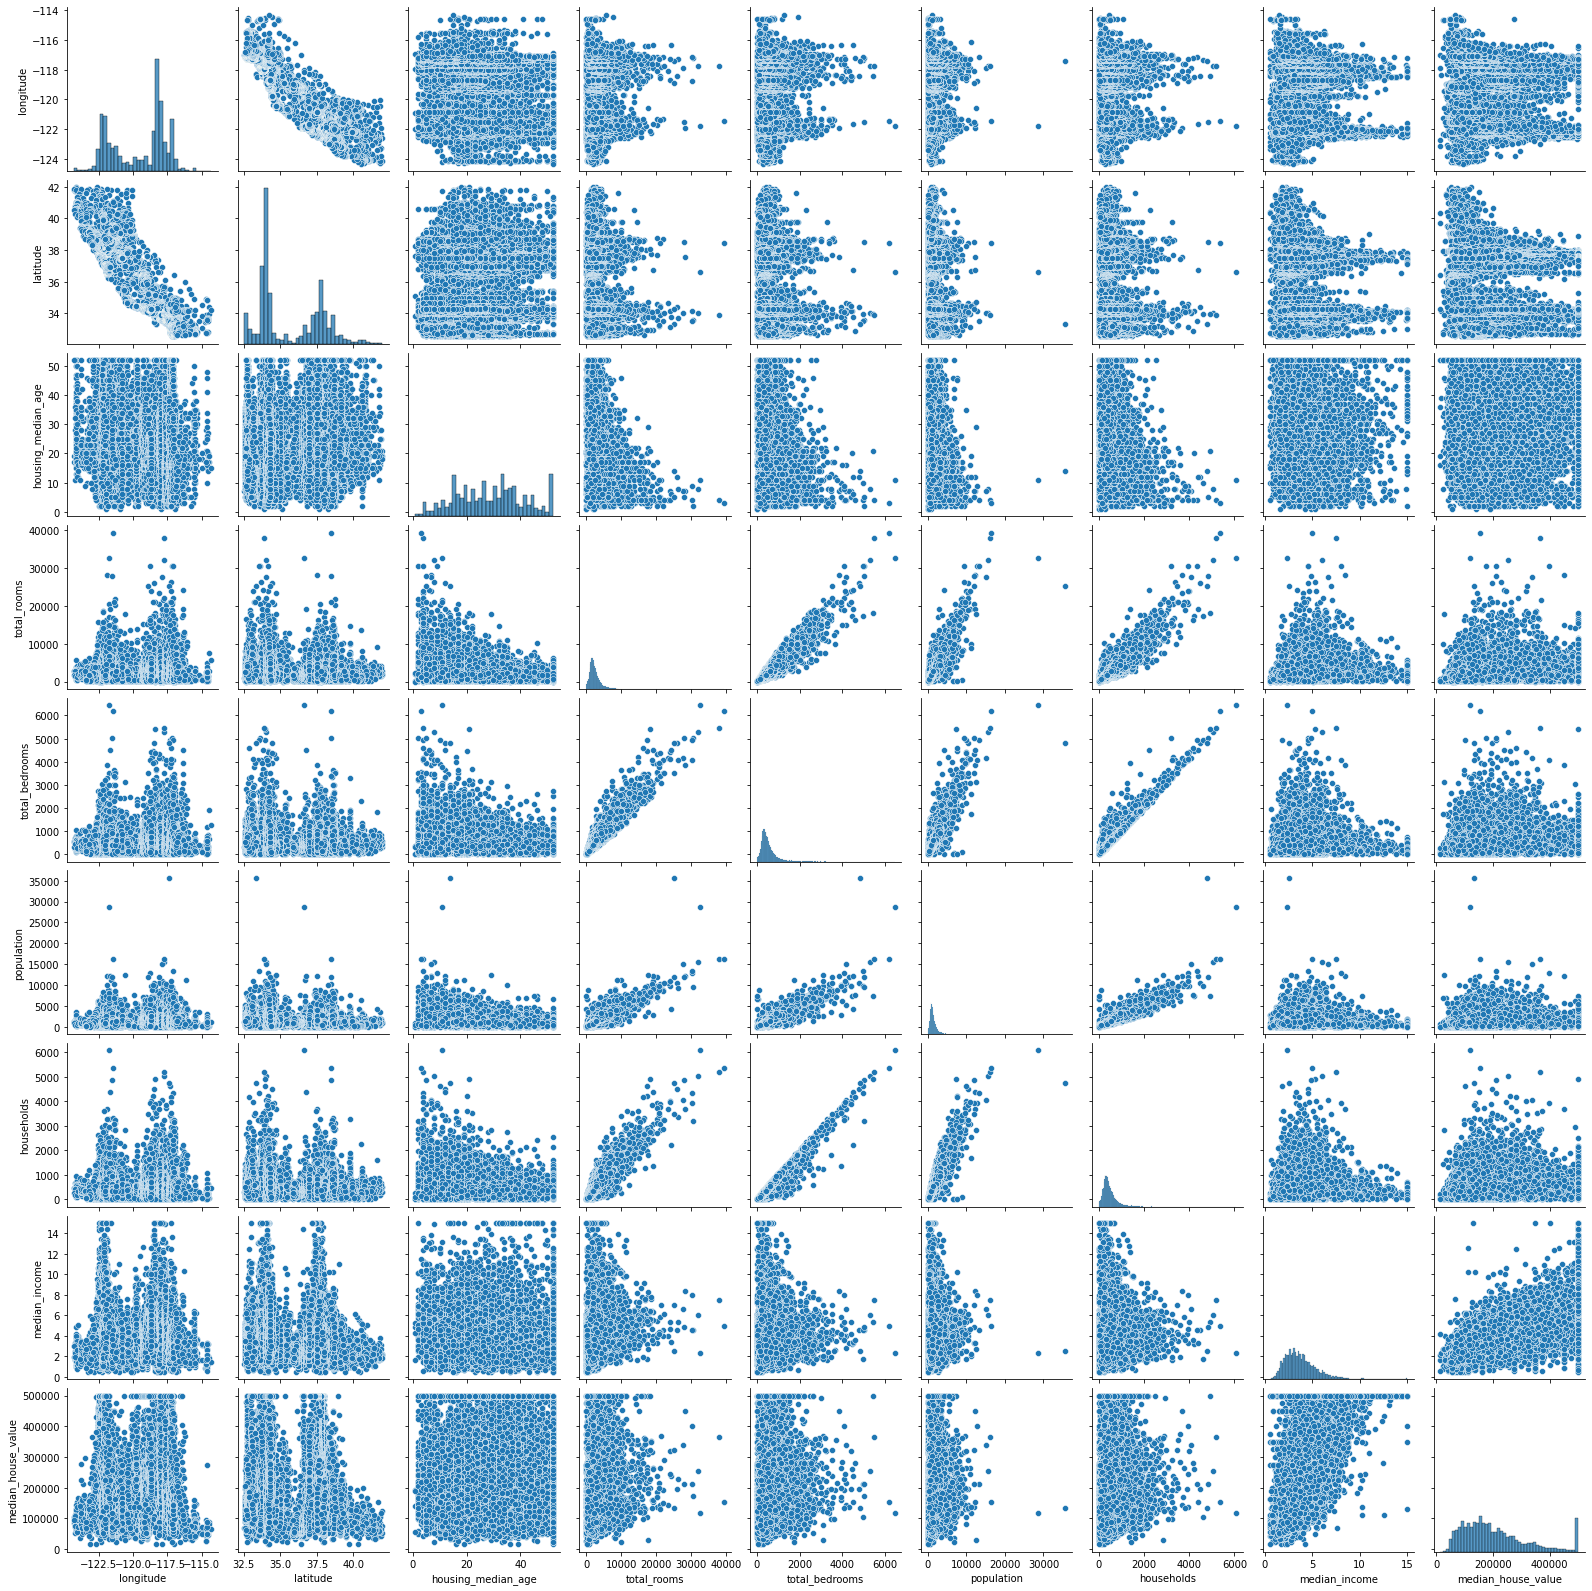

In [ ]:
sns.pairplot(df_dataset)

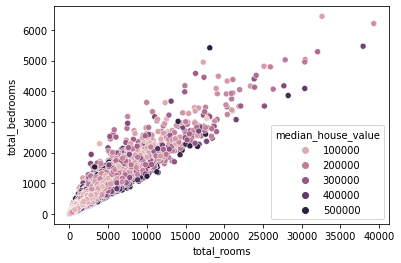

In [ ]:
sns.scatterplot(x=df_dataset['total_rooms'], y=df_dataset['total_bedrooms'], hue=df_dataset['median_house_value'])

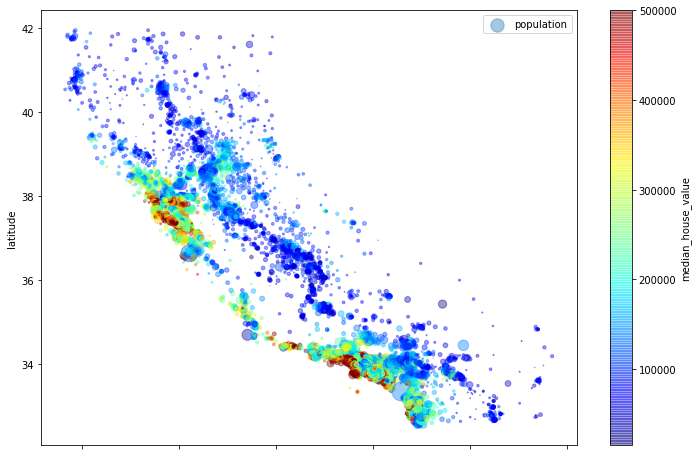

In [ ]:
df_dataset.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=df_dataset['population']/100, label='population',
                figsize=(12, 8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

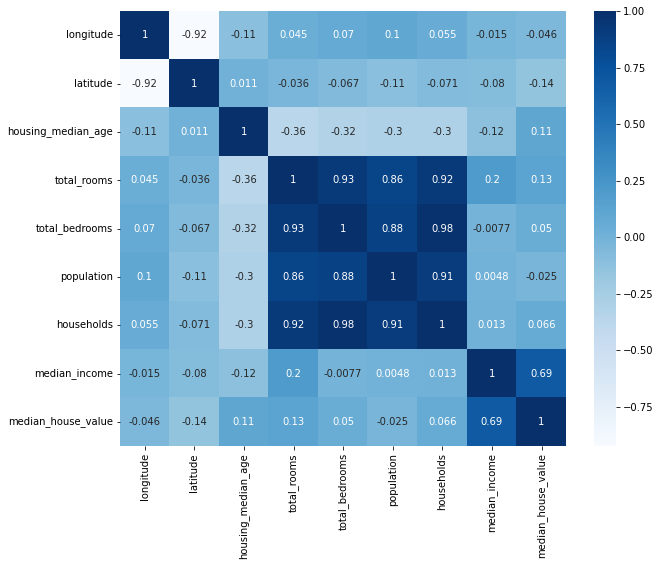

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_dataset.corr(), annot=True, cmap="Blues")

## Select Field and Rename Field

In [ ]:
df_house_price = df_dataset.copy()

In [ ]:
df_house_price.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [ ]:
df_house_price.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df_house_price = df_house_price.rename(columns = {'housing_median_age':'house_age'})
df_house_price.head()

,house_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df_house_price = df_house_price.rename(columns = {'median_house_value': 'house_value'})
df_house_price.head()

,house_age,total_rooms,total_bedrooms,population,households,median_income,house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#fill na
median = df_house_price["total_bedrooms"].median()
df_house_price["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
df_house_price.isnull().sum()

house_age          0
total_rooms        0
total_bedrooms     0
population         0
households         0
median_income      0
house_value        0
ocean_proximity    0
dtype: int64

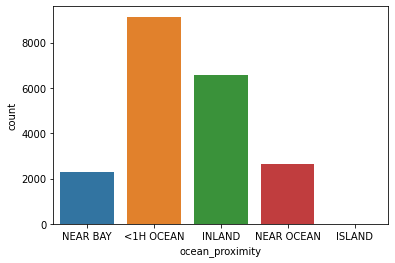

In [ ]:
sns.countplot(x=df_house_price['ocean_proximity'], data=df_house_price)

In [ ]:
df_house_price.groupby('ocean_proximity').count()

,house_age,total_rooms,total_bedrooms,population,households,median_income,house_value
ocean_proximity,,,,,,,
<1H OCEAN,9136,9136,9136,9136,9136,9136,9136
INLAND,6551,6551,6551,6551,6551,6551,6551
ISLAND,5,5,5,5,5,5,5
NEAR BAY,2290,2290,2290,2290,2290,2290,2290
NEAR OCEAN,2658,2658,2658,2658,2658,2658,2658


In [ ]:
df_house_price = pd.get_dummies(df_house_price, drop_first = True, prefix=None)
df_house_price.head()

,house_age,total_rooms,total_bedrooms,population,households,median_income,house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### Histogram chart untuk setiap field yang berformat numerik

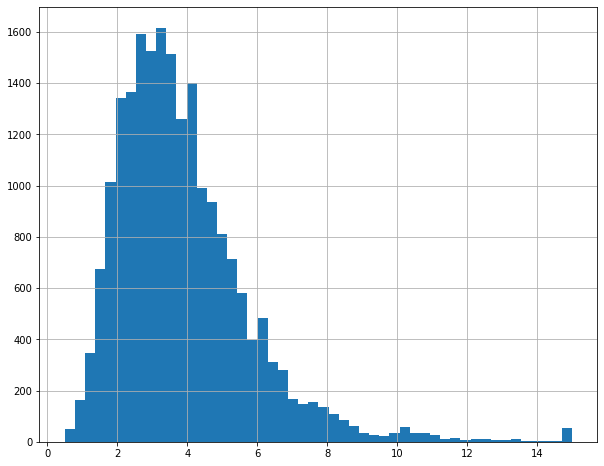

In [ ]:
df_housing['median_income'].hist(bins=50, figsize=(10, 8))
plt.show()

Nilai median income sebagian besar berada diantara 1.5 dan 6.


median_income diubah menjadi 5 kategori

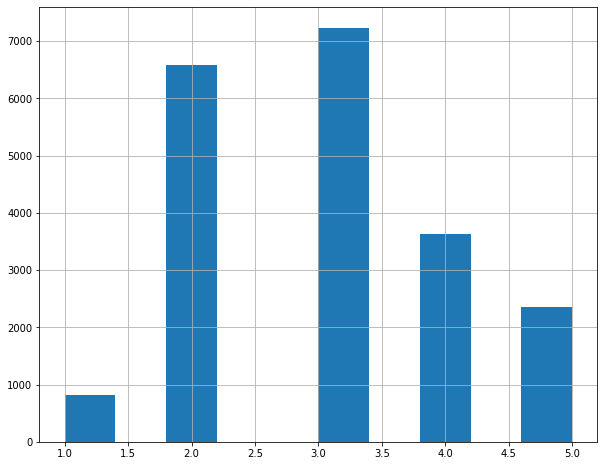

In [ ]:
import numpy as np

df_housing['income_cat'] = pd.cut(df_housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
df_housing['income_cat'].hist(figsize=(10, 8))
plt.show()

In [ ]:
df_housing.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
income_cat            20640
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df_housing, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_housing, df_housing["income_cat"]):
    data_train = df_housing.loc[train_index]
    data_test = df_housing.loc[test_index]
print(data_train['income_cat'].value_counts() / len(data_train))

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64


In [ ]:
for set_ in (data_train, data_test):
    set_.drop('income_cat', axis=1, inplace=True)
#housing = strat_train_set.copy()

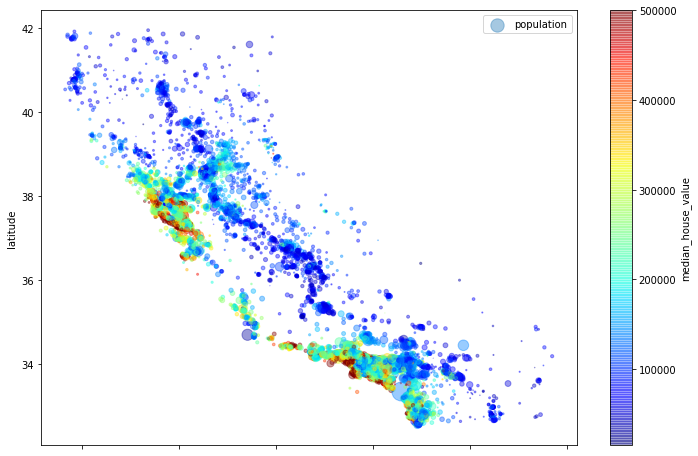

In [ ]:
data_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=data_train['population']/100, label='population',
                figsize=(12, 8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [ ]:
corr_matrix = data_train.corr()
print(corr_matrix.median_house_value.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


In [ ]:
df_stg_housing = data_train.copy()

In [ ]:
df_stg_housing["rooms_per_household"] = df_stg_housing["total_rooms"]/df_stg_housing["households"]
df_stg_housing["bedrooms_per_room"] = df_stg_housing["total_bedrooms"]/df_stg_housing["total_rooms"]
df_stg_housing["population_per_household"] = df_stg_housing["population"]/df_stg_housing["households"]

corr_matrix = df_stg_housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64


In [ ]:
df_stg_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


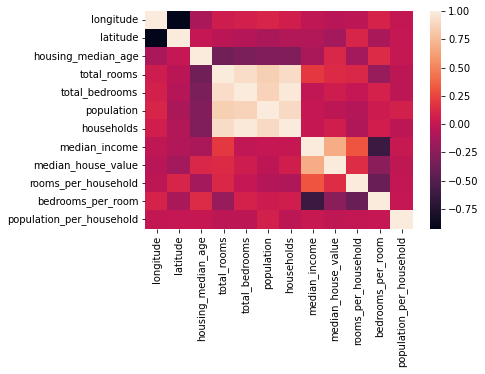

In [ ]:
import seaborn as sns

sns.heatmap(corr_matrix)

In [ ]:
# Data Preparation
housing = data_train.drop("median_house_value", axis=1)
housing_labels = data_train["median_house_value"].copy()

# fillna with media value
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

data = housing.iloc[:5]
labels = housing_labels.iloc[:5]
data_preparation = full_pipeline.transform(data)
print("Predictions: ", lin_reg.predict(data_preparation))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [ ]:
# https://www.kaggle.com/swati2212/house-price-prediction
# 